In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd

Link de la fuente: https://github.com/nshomron/covidpred

In [ ]:
from google.colab import drive  ## importar
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid=pd.read_csv('/content/drive/MyDrive/corona_tested_individuals_ver_0083.english.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **ANÁLISIS DESCRIPTIVO**

In [ ]:
covid.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [ ]:
covid.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06
mean,4.059584e-02,3.536649e-02,1.096917e-02,4.016997e-03,2.185557e-02
std,1.973521e-01,1.847044e-01,1.041578e-01,6.325237e-02,1.462119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


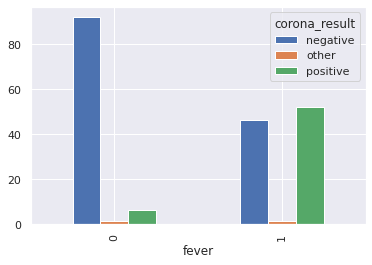

In [ ]:
plot = pd.crosstab(index=covid['fever'],
            columns=covid['corona_result']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
#impacto del síntoma fiebre en los resultados positivos y negativos

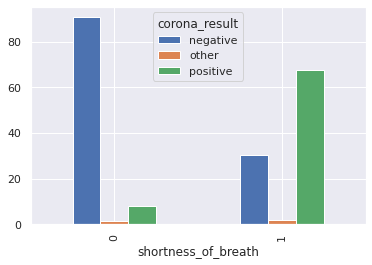

In [ ]:
plot = pd.crosstab(index=covid['shortness_of_breath'],
            columns=covid['corona_result']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
#impacto del síntoma problemas de respiración en los resultados positivos y negativos

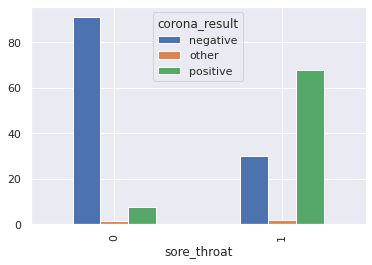

In [ ]:
plot = pd.crosstab(index=covid['sore_throat'],
            columns=covid['corona_result']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
#impacto del síntoma dolor de garganta en los resultados positivos y negativos

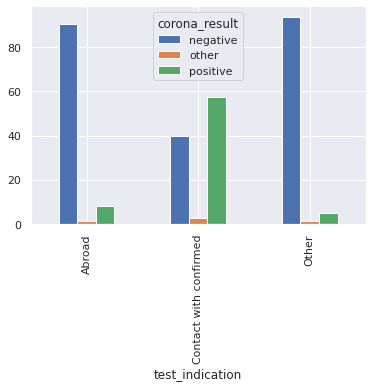

In [ ]:
plot = pd.crosstab(index=covid['test_indication'],
            columns=covid['corona_result']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
#impacto de la variable indicadión de test en los resultados positivos y negativo

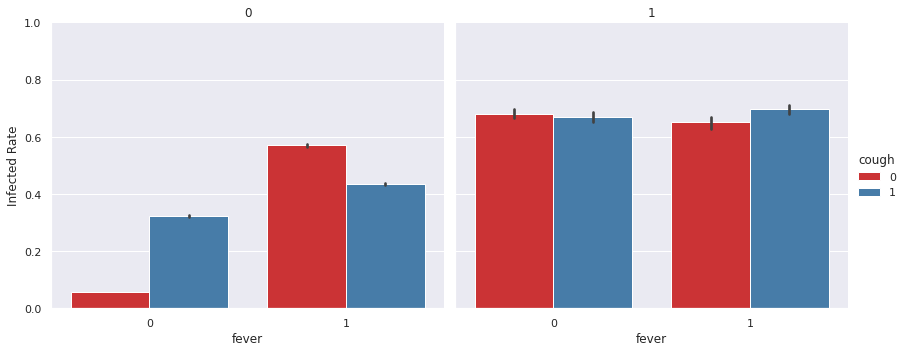

In [ ]:
corona=covid
corona['resultado']=(corona['corona_result']=='positive').astype(int)
g = sns.catplot(x='fever',y='resultado', col = 'shortness_of_breath', data=corona, hue= 'cough',
                kind='bar',aspect=1.2, palette='Set1')
(g.set_axis_labels("fever", "Infected Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

#Relación entre los sintomas Fiebre, problemas para respirar, tos y tasa de infectados
#notamos que mientras el paciente tenga los tres sintomas es mayor la probabilidad de que se encuentre infectado
#de mismo modo, el hecho de tener problemas para respirar junto a algun otro de los 2 síntomas parece mostrar una probabilidad alta de estar infectado

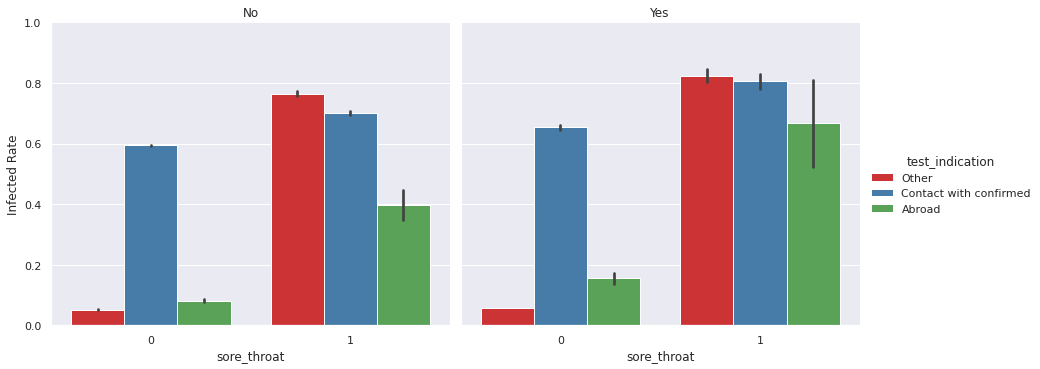

In [ ]:
g = sns.catplot(x='sore_throat',y='resultado', col = 'age_60_and_above', data=corona, hue= 'test_indication',
                kind='bar',aspect=1.2, palette='Set1')
(g.set_axis_labels("sore_throat", "Infected Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

#Relación entre los sintomas dolor de garganta, edad ( mayor a  60  o no) , Indicacion de test y tasa de infectados
#notamos que las personas mayores a  60 que presentaron sintomas de dolor de garganta y tuvieron contacto con algun caso confirmado, estuvieron en el extranjero, u otro tipo de contacto, presentan
# mayor probabilidad de estar infectados

# vemos que el hecho de haber tenido contacto con un caso confirmado influye en la probabilidad de estar infectado en gran medida

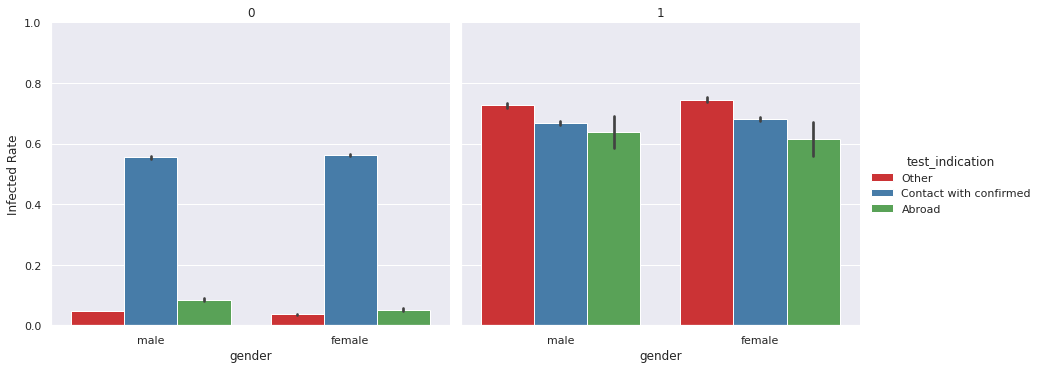

In [ ]:
g = sns.catplot(x='gender',y='resultado', col = 'head_ache', data=corona, hue= 'test_indication',
                kind='bar',aspect=1.2, palette='Set1')
(g.set_axis_labels("gender", "Infected Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

#Relación entre el género, síntoma de dolor de cabeza, Indicacion de test y tasa de infectados
# notamos que el síntoma de dolor de cabeza es significativo para la detección de casos positivos sin importar el género del paciente

In [ ]:
covid=covid.drop('resultado',axis=1)
covid=covid.drop('test_date',axis=1)
covid.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,No,male,Other
1,0,1,0,0,0,negative,No,male,Other
2,0,0,0,0,0,negative,Yes,female,Other
3,0,0,0,0,0,negative,No,male,Other
4,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
# variable menos importantes luego del analisis: género , ya que el covid es una enfermedad que ataca a las personas sin importar de que género sean
# eliminando esa columna y tambien los registros donde el resultado es "other", ya que solo importa conocer casos positivos y negativos en el presente proyecto

# **TRATAMIENTO DE DATOS Y CODIFICACIÓN**

In [ ]:
covid=covid.drop('gender',axis=1)
covid=covid.drop(covid[covid['corona_result']=='other'].index)

covid.corona_result.value_counts()

negative    2480403
positive     220975
Name: corona_result, dtype: int64

In [ ]:
covid.isna().sum()

cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       541045
test_indication             0
dtype: int64

In [ ]:
covid.shape

(2701378, 8)

Eliminando valores nulos 

In [ ]:
covid.dropna(axis=0,inplace=True)

In [ ]:
covid.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
test_indication        0
dtype: int64

In [ ]:
covid.shape

(2160333, 8)

In [ ]:
#covid=covid.drop('test_date',axis=1)

Codificando columnas

In [ ]:
num_to_cat1 = {'Yes':1, 'No':0}
covid.replace({"age_60_and_above": num_to_cat1},inplace=True)

num_to_cat2 = {'Other':2, 'Contact with confirmed':1 , 'Abroad':0}
covid.replace({"test_indication": num_to_cat2},inplace=True)

num_to_cat3 = {'negative':0, 'positive':1 }
covid.replace({"corona_result": num_to_cat3},inplace=True)

covid.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,test_indication
0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,2
2,0,0,0,0,0,0,1,2
3,0,0,0,0,0,0,0,2
4,0,1,0,0,0,0,0,1


In [ ]:
from google.colab import files ## exportando resultado 
covid.to_csv('covid_clean.csv', index = False)
files.download('covid_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
covid_clean=pd.read_csv('/content/drive/MyDrive/avance4/covid_clean.csv')

In [ ]:
covid_clean.shape

(2160333, 8)

In [ ]:
covid_clean.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,test_indication
0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,2
2,0,0,0,0,0,0,1,2
3,0,0,0,0,0,0,0,2
4,0,1,0,0,0,0,0,1


# **EVALUACIÓN DE MODELOS N°1**

In [ ]:
pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [ ]:
X = covid_clean.drop('corona_result',axis=1)
y = covid_clean['corona_result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, stratify=y) 

In [ ]:
def evaluar_modelo(model,xtrain,xtest,ytrain,ytest):
  
  print("En train")
  model.fit(xtrain, ytrain)
  predicted_train=model.predict(xtrain)
  print(confusion_matrix(ytrain, predicted_train))
  print(classification_report(ytrain,predicted_train))
  print("Ahora en test")
  predicted_test=model.predict(xtest)
  print(confusion_matrix(ytest, predicted_test))
  print(classification_report(ytest,predicted_test))

In [ ]:
rf = RandomForestClassifier()
evaluar_modelo(rf,X_train,X_test,y_train,y_test)

En train
[[1132428   38253]
 [  53343   72175]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96   1170681
           1       0.65      0.58      0.61    125518

    accuracy                           0.93   1296199
   macro avg       0.80      0.77      0.79   1296199
weighted avg       0.93      0.93      0.93   1296199

Ahora en test
[[755059  25396]
 [ 35716  47963]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    780455
           1       0.65      0.57      0.61     83679

    accuracy                           0.93    864134
   macro avg       0.80      0.77      0.79    864134
weighted avg       0.93      0.93      0.93    864134



In [ ]:
params = {'max_leaf_nodes': [5,8,10], 
          'max_depth':[3,4,5,10],  
          'n_estimators':[100,150,200],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[2,3,5,8]}

rf = RandomForestClassifier()         
rf_cv = RandomizedSearchCV(rf, params, n_jobs=9, verbose=1, cv=3)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  30 out of  30 | elapsed: 10.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_best_model = rf_cv.best_estimator_
evaluar_modelo(rf_best_model,X_train,X_test,y_train,y_test)

En train
[[1156663   14018]
 [  85946   39572]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96   1170681
           1       0.74      0.32      0.44    125518

    accuracy                           0.92   1296199
   macro avg       0.83      0.65      0.70   1296199
weighted avg       0.91      0.92      0.91   1296199

Ahora en test
[[771089   9366]
 [ 57593  26086]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    780455
           1       0.74      0.31      0.44     83679

    accuracy                           0.92    864134
   macro avg       0.83      0.65      0.70    864134
weighted avg       0.91      0.92      0.91    864134



In [ ]:
xgbcla = XGBClassifier(objective='binary:logistic')
evaluar_modelo(xgbcla,X_train,X_test,y_train,y_test)

En train
[[1132429   38252]
 [  53416   72102]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96   1170681
           1       0.65      0.57      0.61    125518

    accuracy                           0.93   1296199
   macro avg       0.80      0.77      0.79   1296199
weighted avg       0.93      0.93      0.93   1296199

Ahora en test
[[755075  25380]
 [ 35761  47918]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    780455
           1       0.65      0.57      0.61     83679

    accuracy                           0.93    864134
   macro avg       0.80      0.77      0.79    864134
weighted avg       0.93      0.93      0.93    864134



In [ ]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1, 5],
        'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4,5,6],
        'learning_rate': [0.02,0.05,0.1,0.5],
        'n_estimators':[100,150,200],
        }
      
model_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
xg_CV =RandomizedSearchCV(model_xgb, parameters , n_jobs=9, cv=3,verbose=1) 
xg_CV.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  30 out of  30 | elapsed: 31.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=10, n_jobs=9,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'g

In [ ]:
xg_best=xg_CV.best_estimator_
evaluar_modelo(xg_best,X_train,X_test,y_train,y_test) ## mejor que rf_best y rf normal

En train
[[1132368   38313]
 [  53632   71886]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96   1170681
           1       0.65      0.57      0.61    125518

    accuracy                           0.93   1296199
   macro avg       0.80      0.77      0.79   1296199
weighted avg       0.93      0.93      0.93   1296199

Ahora en test
[[755129  25326]
 [ 35474  48205]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    780455
           1       0.66      0.58      0.61     83679

    accuracy                           0.93    864134
   macro avg       0.81      0.77      0.79    864134
weighted avg       0.93      0.93      0.93    864134



# **Balance de clases y evaluación N° 2**

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
SM=SMOTE() 
x_bal, y_bal= SM.fit_resample(X_train,y_train) 
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_bal))

Resampled dataset shape Counter({0: 1170681, 1: 1170681})


In [ ]:
column_names = ["Tos",	"fiebre",	"dolor_de_garganta","dificultad_para_respirar","dolor_de_cabeza","mayor_a_60_años","indicación_de_test"]
X_bal = pd.DataFrame(x_bal, columns = column_names)
Y_bal=pd.DataFrame(y_bal, columns = ['resultado'])

In [ ]:
covid_bal=pd.concat([X_bal, Y_bal], axis=1) 

In [ ]:
covid_bal.isnull().sum()

Tos                         2341362
fiebre                      2341362
dolor_de_garganta           2341362
dificultad_para_respirar    2341362
dolor_de_cabeza             2341362
mayor_a_60_años             2341362
indicación_de_test          2341362
resultado                   2341362
dtype: int64

In [ ]:
covid_bal.head()

,Tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,mayor_a_60_años,indicación_de_test,resultado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import files ## exportando resultado 
covid_bal.to_csv('covid_bal.csv', index = False)
files.download('covid_bal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rf = RandomForestClassifier()
evaluar_modelo(rf,X_bal,X_test,Y_bal,y_test) ## es mejor sin tunning

En train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[1112690   57991]
 [ 406461  764220]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83   1170681
           1       0.93      0.65      0.77   1170681

    accuracy                           0.80   2341362
   macro avg       0.83      0.80      0.80   2341362
weighted avg       0.83      0.80      0.80   2341362

Ahora en test
[[741718  38737]
 [ 29484  54195]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    780455
           1       0.58      0.65      0.61     83679

    accuracy                           0.92    864134
   macro avg       0.77      0.80      0.78    864134
weighted avg       0.93      0.92      0.92    864134



In [ ]:
params = {'max_leaf_nodes': [5,6,8,10], 
          'max_depth':[3,4,5,10],  
          'n_estimators':[100,150,200],
          'min_samples_split':[2,4,5,6,10],
          'min_samples_leaf':[2,3,4,5,8]}

rf = RandomForestClassifier()         
rf_cv = RandomizedSearchCV(rf, params, n_jobs=9, verbose=1, cv=5)
rf_cv.fit(x_bal, y_bal)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed: 36.1min
[Parallel(n_jobs=9)]: Done  50 out of  50 | elapsed: 45.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_best_model = rf_cv.best_estimator_
evaluar_modelo(rf_best_model,x_bal,X_test,y_bal,y_test)

En train
[[1106586   64095]
 [ 404420  766261]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83   1170681
           1       0.92      0.65      0.77   1170681

    accuracy                           0.80   2341362
   macro avg       0.83      0.80      0.80   2341362
weighted avg       0.83      0.80      0.80   2341362

Ahora en test
[[737626  42829]
 [ 29291  54388]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95    780455
           1       0.56      0.65      0.60     83679

    accuracy                           0.92    864134
   macro avg       0.76      0.80      0.78    864134
weighted avg       0.92      0.92      0.92    864134



In [ ]:
xgbcla = XGBClassifier(objective='binary:logistic') ## es igual con tunning
evaluar_modelo(xgbcla,X_bal,X_test,Y_bal,y_test)

En train


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[119423   6095]
 [ 43542  81976]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83    125518
           1       0.93      0.65      0.77    125518

    accuracy                           0.80    251036
   macro avg       0.83      0.80      0.80    251036
weighted avg       0.83      0.80      0.80    251036

Ahora en test
[[741714  38741]
 [ 29477  54202]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    780455
           1       0.58      0.65      0.61     83679

    accuracy                           0.92    864134
   macro avg       0.77      0.80      0.78    864134
weighted avg       0.93      0.92      0.92    864134



In [ ]:
parameters = {
        'min_child_weight': [1, 5, 10, 20],
        'gamma': [0.1, 0.5, 1, 2.5, 5],
        'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4,5,6,8],
        'learning_rate': [0.01,0.05,0.1,0.5,1],
        'n_estimators':[100,150,200],
        }
      
model_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
xg_CV =RandomizedSearchCV(model_xgb, parameters , n_jobs=9, cv=3,verbose=1, n_iter=20) 
xg_CV.fit(X_bal,y_bal)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed: 64.9min
[Parallel(n_jobs=9)]: Done  60 out of  60 | elapsed: 109.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=20, n_jobs=9,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'g

In [ ]:
xg_CV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [ ]:
xg_best=xg_CV.best_estimator_
evaluar_modelo(xg_best,X_bal,X_test,y_bal,y_test)

En train
[[1112763   57918]
 [ 407754  762927]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83   1170681
           1       0.93      0.65      0.77   1170681

    accuracy                           0.80   2341362
   macro avg       0.83      0.80      0.80   2341362
weighted avg       0.83      0.80      0.80   2341362

Ahora en test
[[741640  38815]
 [ 29294  54385]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    780455
           1       0.58      0.65      0.61     83679

    accuracy                           0.92    864134
   macro avg       0.77      0.80      0.79    864134
weighted avg       0.93      0.92      0.92    864134



In [ ]:
# sin balance los modelos dan mas precisión , pero menor recall
# con balance detecto mejor a los positivos , y el que mejor lo hace es el XG boost con tunning , el random forest sin tunning lo hace muy parecido
# solo varian una poca cantidad de positivos detectados , me quedo con XGboost en balance , por la mayor cantidad de positivos que detecto y por su F1 score

# **EXPLICABILIDAD DEL MODELO**

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 4.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491617 sha256=6970d5c9586f27f92276105a6827ba259dbd3615b5277d16a4d8e624622cdf02
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
explainer = shap.TreeExplainer(xg_best)
shap_values = explainer.shap_values(X)

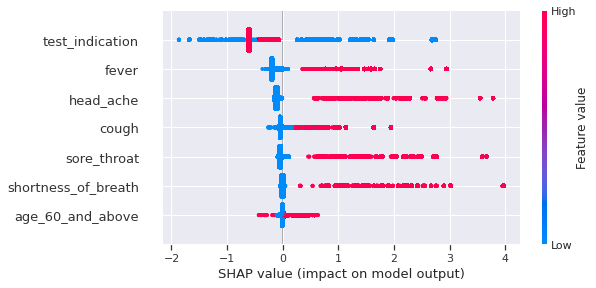

In [ ]:
shap.summary_plot(shap_values, X) 

In [ ]:
# notamos que los valores 1 de síntomas afectan a la predicción en gran medida, es decir mientras más sintomas tengan las personas es más probable que el modelo determine que tienen covid
# de los síntomas los que tiene más impacto en el modelo son dolor de garganta, problemas para respirar , dolor de cabeza y fiebre
# un valor bajo de test_indication, es decir, 0 o 1 , tiene impacto en la predicción de las predicciones, haciendo más probable que tengan covid , y el valor alto 2 , tambien afecta en gran medida
# al modelo haciendo que disminuya la probabilidad de que tenga covid
# Por último respecto a la edad , vemos que el valor de 1 aumenta la probabilidad de tener covid pero no en todos los casos, se observa que en algunos tener mas de 60 años también disminuye la probabilidad
# y para el valor 0 , es decir , menor a 60 el modelo no lo considera como no tan impactante en la predicción de varias muestras

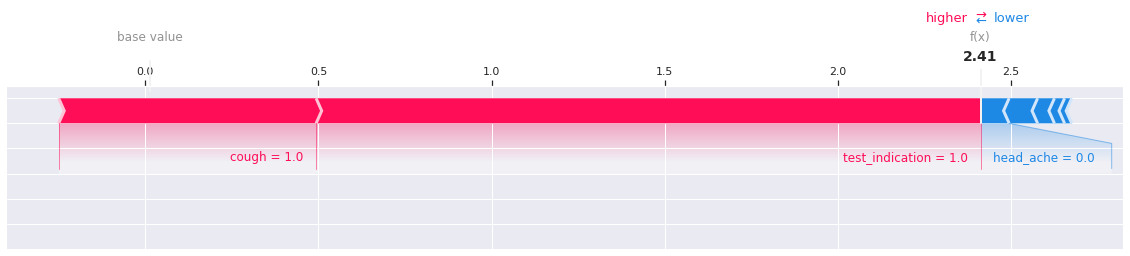

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[15,:], X.iloc[15,:],matplotlib=True)

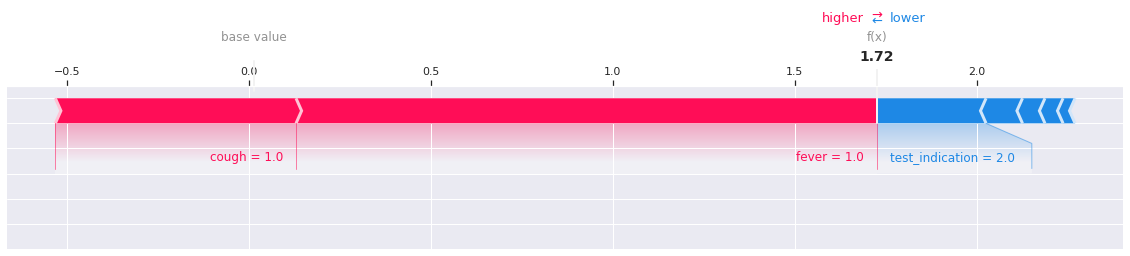

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[20,:], X.iloc[20,:],matplotlib=True)


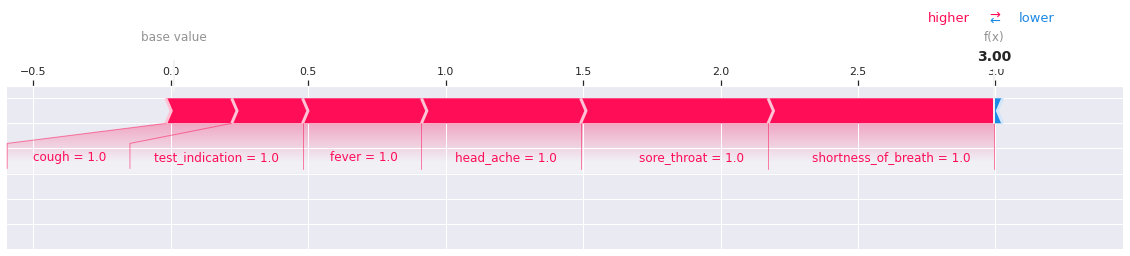

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[2160328,:], X.iloc[2160328,:],matplotlib=True)

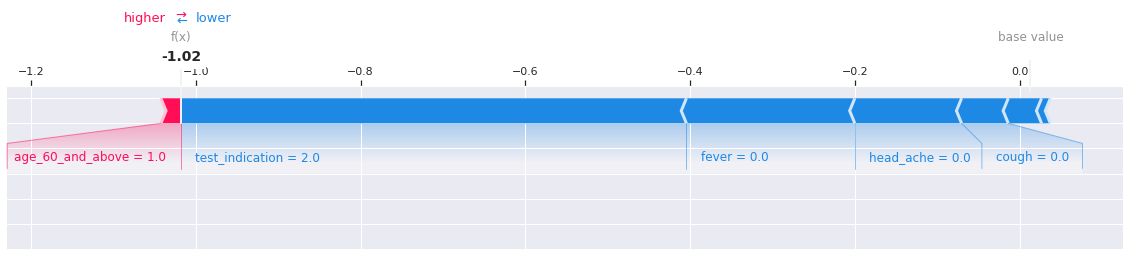

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[136,:], X.iloc[136,:],matplotlib=True)

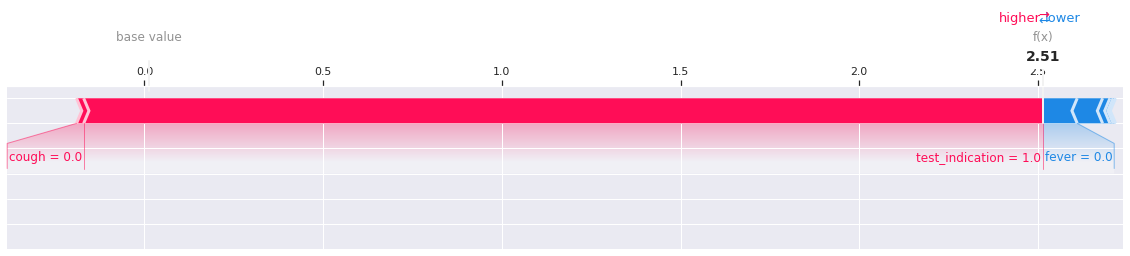

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[352,:], X.iloc[352,:],matplotlib=True)

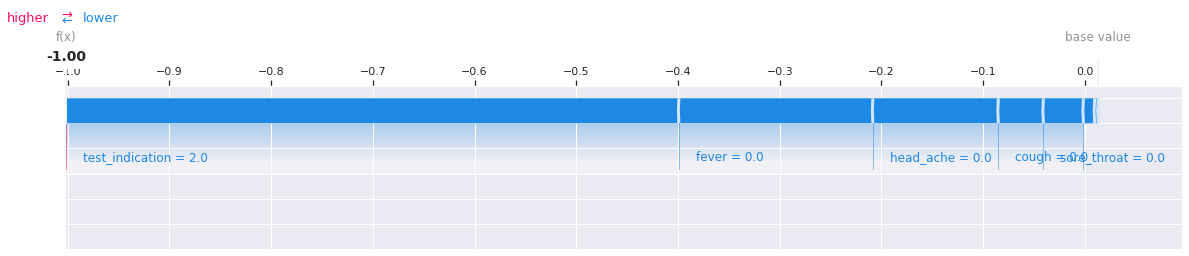

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[305,:], X.iloc[305,:],matplotlib=True) # esta persona era asintomatica

In [ ]:
c_pos = covid_clean[covid_clean['corona_result'] == 1]
c_pos.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,test_indication
136,0,0,0,0,0,1,1,2
149,0,0,0,0,0,1,0,2
181,0,0,0,0,0,1,0,2
182,0,0,0,0,0,1,0,2
195,1,1,0,0,0,1,1,2
305,0,0,0,0,0,1,0,2
352,0,0,0,0,0,1,0,1
372,0,0,0,0,0,1,0,1
373,1,0,0,0,0,1,0,2
406,0,0,0,0,0,1,0,2
